In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,24K,2009
1,The Miracle Rider,1935
2,Faust,1960
3,Soul of the Avenger,1997
4,Otoko wa tsurai yo: Boukyou hen,1970


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [22]:
movies = cast[(cast.character == 'Superman') | (cast.character == 'Batman')].groupby(['year', 'character']).size().unstack()
movies[~movies.Superman.isnull() & (movies.Batman.isnull() | (movies.Superman>movies.Batman))]

character,Batman,Superman
year,,
1948,NaN,1.0
1950,NaN,1.0
1951,NaN,2.0
1954,NaN,5.0
1955,NaN,1.0
1973,1.0,2.0
1978,NaN,2.0
1980,NaN,2.0
1983,NaN,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
movies = cast[(cast.character == 'Superman') | (cast.character == 'Batman')].groupby(['year', 'character']).size().unstack()
movies[~movies.Batman.isnull() & (movies.Superman.isnull() | (movies.Superman<movies.Batman))]

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1949,2.0,NaN
1953,2.0,NaN
1957,2.0,NaN
1965,1.0,NaN
1966,1.0,NaN
1967,1.0,NaN


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

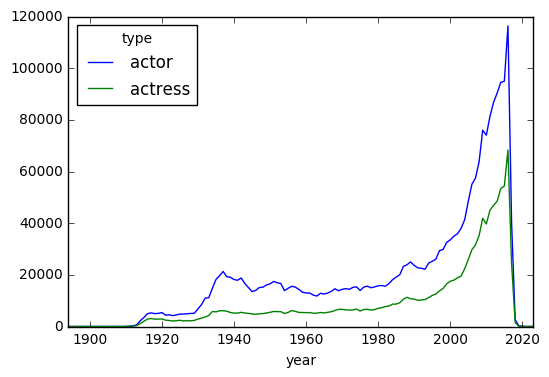

In [38]:
series = cast.groupby(['year', 'type']).size()
series = series.unstack()
series = series.fillna(0)
ax = series.plot.line()
ax

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

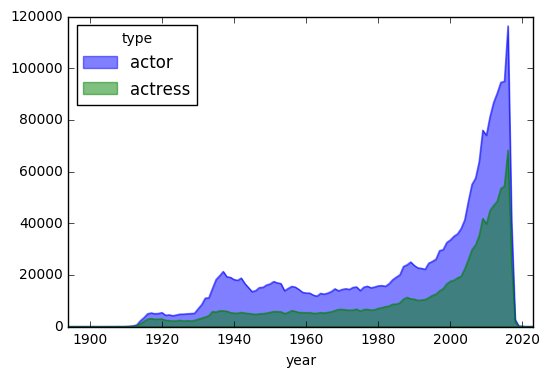

In [40]:
series = cast.groupby(['year', 'type']).size()
series = series.unstack()
series = series.fillna(0)
ax = series.plot.area(stacked=False)
ax

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

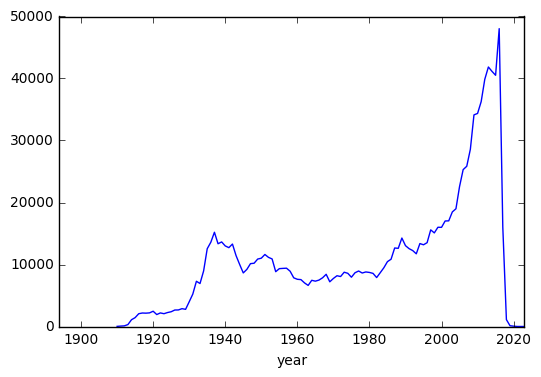

In [58]:
series = cast.groupby(['year', 'type']).size()
series = series.unstack('type')
(series.actor-series.actress).plot.line()

In [59]:
0

0

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

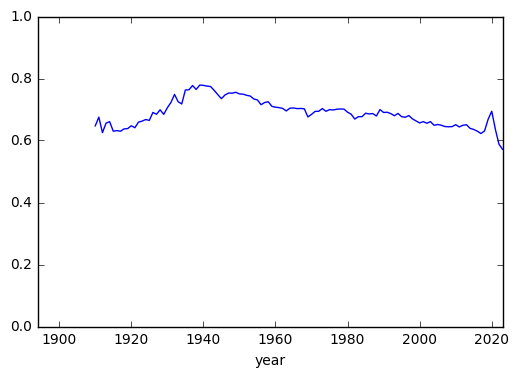

In [61]:
series = cast.groupby(['year', 'type']).size()
series = series.unstack('type')
(series.actor/(series.actor+series.actress)).plot.line(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

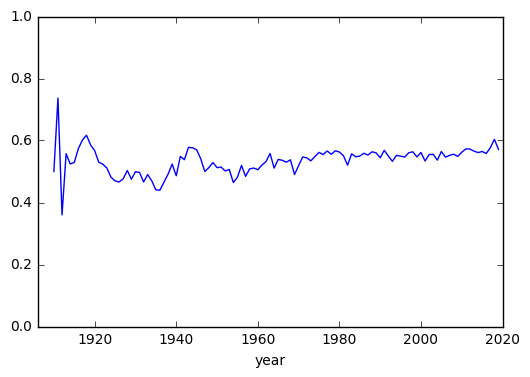

In [62]:
series = cast[cast.n==2].groupby(['year', 'type']).size()
series = series.unstack('type')
(series.actor/(series.actor+series.actress)).plot.line(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

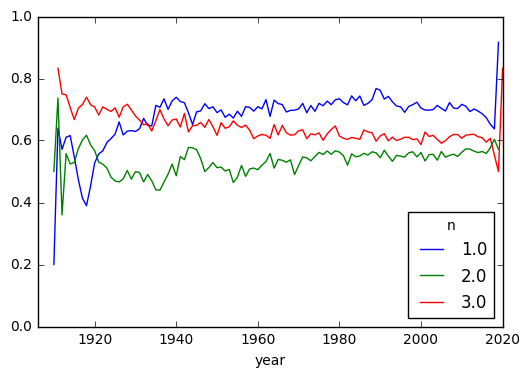

In [74]:
series = cast[(cast.n>=1) & (cast.n<=3)].groupby(['year','type', 'n']).size()
series = series.unstack('type')
x = series.actor/(series.actor + series.actress)
x.unstack().plot.line(ylim=[0,1])